# Darstellung von Qubit-Zuständen



## Inhalt

1. [Klassische vs. Quantenbits](#cvsq)    
    
2. [Darstellung von Qubits in Qiskit](#exploring-qubits)    
    
3. [Berechnung von Messwahrscheinlichkeiten](#rules-measurement)    
    
4. [Globale Phase](#global-phase)

5. [Die Bloch-Kugel](#bloch-sphere)




## 1. Klassische vs. Quanten-Bits <a id="cvsq"></a>




Klassische Bits befinden sich zu jedem Zeitpunkt in einem der beiden Zustände `0` or `1`. Somit können wir den Zustand eines klassischen Bits (`c`) schreiben als `c = 0` oder `c = 1`.

Ein Qubit (q) kann diese Zustände zwar auch annehmen, i. A. befindet es sich aber in einem Überlagerungszustand dieser beiden Zustände $0$ oder $1$. Diese stellen deshalb die $\textbf{Basis}$ der Zustände eines Qubits dar.

Diese Basiszustände können als zweidimensionale Vektoren dargestellt werden:

$$
|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \, \, \, \, |1\rangle =\begin{bmatrix} 0 \\ 1 \end{bmatrix}.
$$

Für die Zustände dieser Qubits wird die Dirac'sche Klammerschreibweise verwendet: $|$ und $\rangle$. Damit können wir den Zustand eines Qubits z. B. folgendermassen schreiben:
<p>
      $$
      \begin{aligned} 
      |q_0\rangle & = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle \\
                  & = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1\\0\end{bmatrix} + \tfrac{i}{\sqrt{2}}\begin{bmatrix}0\\1\end{bmatrix}\\
                  & = \begin{bmatrix}\tfrac{1}{\sqrt{2}}\\0\end{bmatrix} + \begin{bmatrix}0\\\tfrac{i}{\sqrt{2}}\end{bmatrix}\\
                  & = \begin{bmatrix}\tfrac{1}{\sqrt{2}} \\ \tfrac{i}{\sqrt{2}} \end{bmatrix}\\
      \end{aligned}
      $$
 
</p>




Dieser Vektor $|q_0\rangle$ wird als $\textbf{Zustandsvektor}$ des Qubits in der Basis $|0\rangle$ und $|1\rangle$ bezeichnet. 

Die übliche Redeweise besteht darin, den Zustandsvektor $|q_0\rangle$ als $\textbf{Superposition}$ der Basisvektoren bzw. Zustände  $|0\rangle$ und $|1\rangle$ zu bezeichenen.

In der Quantenmechanik ist desweiteren zu beachten, dass die Koeffizienten bzw. Amplituden wie in diesem Beispiel komplex sein können. Dieser zusätzliche Freiheitsgrad ist notwendig, um die Beobachtungen wie z.B.beim $Stern$-$Gerlach$ $Experiment$ schlüssig zu beschreiben.


## 2. Darstellung von Qubits in Qiskit <a id="exploring-qubits"></a>

Dazu müssen wiederum zuerst die benötigten Tools importiert werden:

In [1]:
from qiskit import QuantumCircuit, execute, BasicAer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In Qiskit, wird ein Schaltkreis im Objekt `QuantumCircuit` abgespeichert. In diesem sind die Qubits und die Quantengatter abgelegt.

In [2]:
qc = QuantumCircuit(1) # Erzeugung eines Schaltkreises mit einem Qubit

Die Qubits starten dabei immer im Zustand $|0\rangle$. Möchte man von einem anderen Zustand ausgehen, können die Qubits mit der Methode `initialize()` in den gewünschten Zustand transformiert werden. Die Anwendung dieser Methode wird im Folgenden aus den Beispielen ersichtlich. 

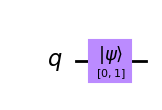

In [3]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw('mpl')  # Let's view our circuit (text drawing is required for the 'Initialize' gate due to a known bug in qiskit)

Nun muss Qiskit mitgeteilt werden, wie der Schaltkreis ausgewertet werden soll. Hier wird der`statevector_simulator` verwendet:

In [4]:
backend = BasicAer.get_backend('statevector_simulator') # Angabe, wie der Schaltkreis ausgewertet werden soll

Anschliessend wird mit der Funktion `execute` der Durchlauf des Schaltkreises gestartet. Dazu müssen der Funktion der Name des Schaltkreises und das Backend als Argumente übergeben werden. Mit der Methode `.result()` erhält man schliesslich das Ergebnis:

In [5]:
qc = QuantumCircuit(1) # Erzeugt einen Quantenschaltkreis mit einem Qubit
initial_state = [0,1]   # Hier wird der Ausgangszustand zu |1> definiert
qc.initialize(initial_state, 0) # Damit wird das 0'te Qubit mit dem zuvor definierten Wert initialisiert
result = execute(qc,backend).result() # Hiermit wird die Simulation gestartet und das Ergebnis zurückgegeben

To get the results from our circuit, we use `execute` to run our circuit, giving the circuit and the backend as arguments. We then use `.result()` to get the result of this:

Von `result`, erhalten wir den Zustandsvektor mit `.get_statevector()`:

In [6]:
out_state = result.get_statevector()
print(out_state) # Damit wird der Zustandsvektor augegeben

[0.+0.j 1.+0.j]


**Anmerkung:** Python benutzt `j` anstelle von $i$ für die imaginäre Einheit. In diesem Beispiel sind die imaginären Komponenten jeweils `Null`: `0.+0.j` = 0, and `1.+0.j` = 1.

Um schliesslich das Rechenergebnis zu erhalten, muss Zustandsveltor des Ergebnisses ausgelesen, bzw. $gemessen$ werden:

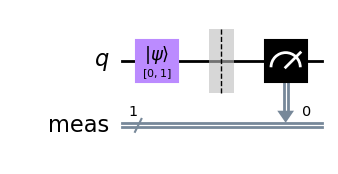

In [7]:
qc.measure_all()
qc.draw('mpl')  #Das Argument `mpl` bewirkt, dass der Schaltkreis schön gezeichnet wird

Bei mehrfacher Ausführung der Messung, werden die zusätzlichen Durchläufe rechts an den Schaltkreis angehängt. 
Nun kann man anstelle des Zustandsvektors auch die Anzahl Zählungen von `0` und `1` anzeigen lassen. Die erfolgt mit `.get_counts()`:

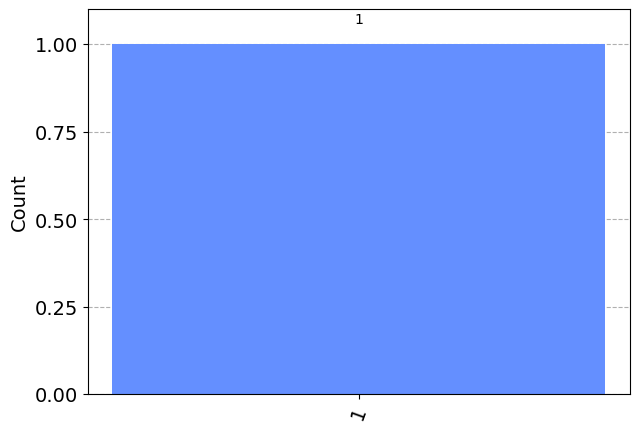

In [8]:
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

Weil das Ausgangsqubit im Zustand $|1\rangle$ war, erhalten wir als Ergebnis auch zu 100% den Wert $|1\rangle$.

Setzen wir das Qubit zu Begin hingegen in einen Überlagerungszustand, sind die Messergebnisse zufällig. Ausgehend vom Zustand $|q_0\rangle$, setzen wir das Qubit z. B. in den folgenden Anfangszustand:

$$ |q_0\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle $$

Die entsprechenden Amplituden werden wieder als Python-Liste geschrieben und der Variablen `initial_state` zugeordnet:

In [9]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Definition des Überlagerungszustandes |q>

Der Übersichtlichkeit wegen wiederholen wir die Initialisierung des Schaltkreises von oben:

In [10]:
qc = QuantumCircuit(1) # Hier wird gc nochmals definiert
qc.initialize(initial_state, 0) # Initialisierung des 0ten Qubits in in den Zustand von `initial_state`
state = execute(qc,backend).result().get_statevector() # Führt den Schaltkreis aus
print(state)           # Gibt das Resultat aus

[7.07106781e-01+0.j         4.32978028e-17+0.70710678j]


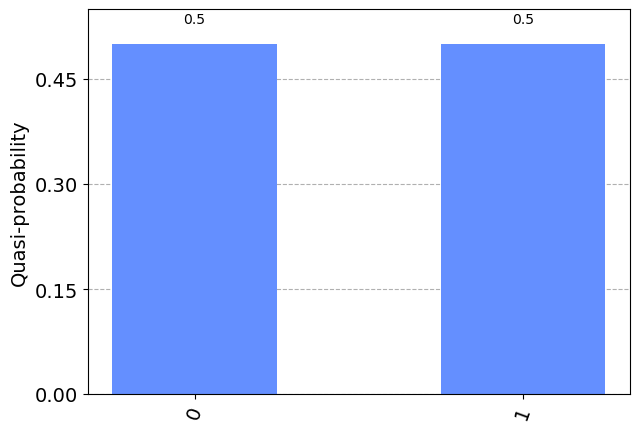

In [11]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

Das Histogramm zeigt nun die Messwahrscheinlichkeiten an. Aufgrund der gewählten Amplituden sind beide Messwerte $|0\rangle$ und $|1\rangle$ gleich wahrscheinlich. Sie besitzen je die Wahrscheinlichkeit von $p=0.5$ bzw. von je $50\%$.

Vervollständigen wir den Schaltkreis mit einer Messung und führen die Messungen durch, wird jeweils entweder das Ergebnis $|0\rangle$ und $|1\rangle$ angezeigt. Wiederholt man den Messvorgang mehrmals, kann man direkt beobachten, wie die Messergebnisse etwa zu gleichen Anteilen zu $|0\rangle$ und $|1\rangle$ erscheinen:


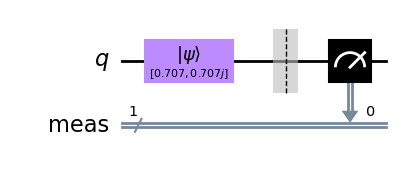

In [12]:
qc.measure_all()
qc.draw('mpl')  #Das Argument `mpl` bewirkt, dass der Schaltkreis schön gezeichnet wird

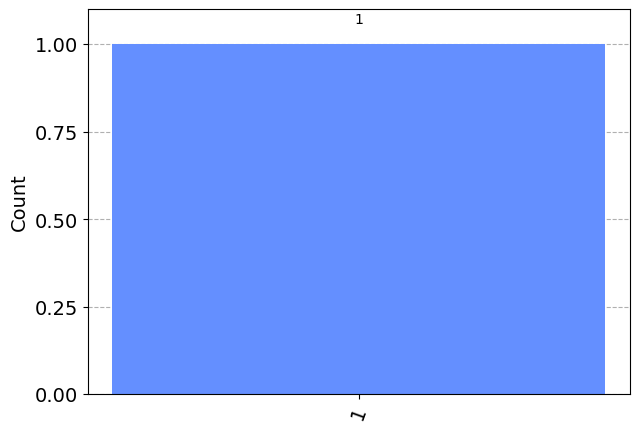

In [13]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

Wir sehen also, dass wir tatsächlich etwa gleiche Wahrscheinlichkeiten für die möglichen Messergebnisse $|0\rangle$ und $|1\rangle$ haben.





## 3. Berechnung der Messwahrscheinlichkeiten<a id="rules-measurement"></a>


Ein beliebiger quantenmechanischer Zustand $|\psi \rangle$ lässt sich als Superposition von Basiszuständen $|x_i\rangle$ darstellen. Die Messwahrscheinlichkeit eines Basiszustandes berechnet sich gemäss den Gesetzen der Quantenmechanik allgemein zu:

$$p(|x_i\rangle) = | \langle x_i| \psi \rangle|^2$$


Dabei bedeutet $\langle x_i |$ den $adjungierten$ Vektor von $|x_i\rangle$. $\langle x_i |$ ist gegenüber $|x_i\rangle$ transponiert und konjungiert komplex und stellt deshalb einen Reihenvektor dar.  In der Quantenmechanik bezeichnet man die Spaltenvektoren als _kets_ und die Reihenvektoren als _bras_. Zusammengeführt spricht man deshalb auch von _bra-ket_ - Notation. Jeder _ket_ $|a\rangle$ hat demnach einen entsprechenden _bra_ -Vektor $\langle a|$.


Damit lässt sich das <i>innere Produkt</i> von zwei Zustandsvektoren $|a\rangle$ und $|b\rangle$ schreiben als:
        
$$\langle a| = \begin{bmatrix}a_0^*, & a_1^*, & \dots & a_n^* \end{bmatrix}, \quad
    |b\rangle = \begin{bmatrix}b_0 \\ b_1 \\ \vdots \\ b_n \end{bmatrix}$$
    $$\langle a|b\rangle = a_0^* b_0 + a_1^* b_1 \dots a_n^* b_n$$
    
\
Daraus erkennen wir, dass dieses Produkt immer einen $Skalar$ liefert. Es stellt deshalb eine Verallgemeinerung des für reelle Vektoren bekanne Skalar- bzw. Punktprodukts dar. 
  
  
  Wie bei reellen Vektoren das Skalarprodukt verschwindet auch das innere Produkt bei orthogonalen, komplexewertigen Vektoren. Wir sehen das am Beispiel der beiden Vektoren  $|0\rangle$ und $|1\rangle$:
  <p>
    $$\langle 1|0\rangle = \begin{bmatrix} 0 , & 1\end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix} = 0$$
  </p>  
  Bei  normierten Vektoren liefert das innere Produkt den Wert $1$, wie man an den beiden Basisvektoren  $|0\rangle$ and $|1\rangle$ sehen kann:
    
$$
      \begin{aligned} 
      \langle0|0\rangle & = \begin{bmatrix} 1 , & 0\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = 1 \\
      \langle1|1\rangle & = \begin{bmatrix} 0 , & 1\end{bmatrix}\begin{bmatrix}0 \\ 1\end{bmatrix} = 1
      \end{aligned}
$$
   


Nach der oben angegebenen Regel können wir nun z. B. für unseren präparierten Zustand $|q_0\rangle$ die Wahrscheinlichkeit
für die Messung des Zustandes $|0\rangle$ berechnen:

$$
\begin{aligned}
|q_0\rangle & = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle \\
\langle 0| q_0 \rangle  & = \tfrac{1}{\sqrt{2}}\langle 0|0\rangle + \tfrac{i}{\sqrt{2}}\langle 0|1\rangle \\
& = \tfrac{1}{\sqrt{2}}\cdot 1 +  \tfrac{i}{\sqrt{2}} \cdot 0\\
& = \tfrac{1}{\sqrt{2}}\\
|\langle 0| q_0 \rangle|^2 & = \tfrac{1}{2}
\end{aligned}
$$

Analog können wir die Messwahrscheinlichkeit für den Zustand $|1\rangle$ berechnen. Da die beiden Amplituden des Vektors gleich sind und der Vektor zudem normiert ist, erkennen wir, dass das Quadrat dieser Amplituden exakt der Messwahrscheinlichkeit entspricht.

Aus diesem Grund werden die Zustandsvektoren immer so gewählt, dass ihr Betragsquadrat $1$ ist:

$$ \langle\psi|\psi\rangle = 1 \\ $$

Für die Amplituden eines eines beliebigen Zustandsvektors:

$$ |\psi\rangle = \alpha|0\rangle + \beta|1\rangle $$

folgt daraus die allgemeine Normierungsbedingung für die Amplituden:

$$ \sqrt{|\alpha|^2 + |\beta|^2} = 1 $$

Deshalb müssen die beiden Amplituden unseres Zustandsvektord beide den Wert $\sqrt{2}$ haben. Falls man diese Normierungsbedingung bei der Definition eines Zustandes mit der Funktion `initialize()` nicht beachtet, wird eine Fehlermeldung ausgegeben, wie das folgende Beispiel zeigt:


In [14]:
vector = [1,1]
qc.initialize(vector, 0)

QiskitError: 'Sum of amplitudes-squared is not 1, but 1.4142135623730951.'

#### Eine kurze Übung
1. Erstelle einen Zustandsvektor mit der Wahrscheinlichkeit $p=1/3$ den Zustand $|0\rangle$ zu messen.
2. Erzeuge einen anderen Zustandsvektor mit derselben Messwahrscheinlichkeit.
3. Überzeuge dich anschliessend davon, dass die Wahrscheinlichkeit den Zustand $|1\rangle$ zu messen für beide Zustände $p=2/3$ beträgt.

### Anmerkung

Das bisher gesagte gilt ganz allgemein für einen Zustand $|\psi\rangle$ in einer orthonormierten Basis $p(|x_i\rangle)$ und ist nicht nur auf die Zustände $|0\rangle$ oder $|1\rangle$ beschränkt.

Dieser Sachverhalt wird im nächsten Abschnitt näher erläutert.

 ## 4. Globale Phase<a id="global-phase"></a>

Im Allgemeinen sind in der Quantenmechanik auch Zustände mit komplexwertigen Komponenten zugelassen und möglich, wie z. B. der folgende Zustand:

$$\begin{bmatrix}0 \\ i\end{bmatrix} = i|1\rangle.$$


Welche Messwahrscheinlichkeit ergibt sich für solche Zustände? Wenden wir dazu die obige Regel zur Berechnung der Messwahrscheinlichkeit auf diesen Zustand an, erhalten wir:

$$ |\langle x| (i|1\rangle) |^2 = | i \langle x|1\rangle|^2 = |\langle x|1\rangle|^2 $$

Dabei sehen wir, dass der imaginäre Faktor $i$ verschwindet. Die Messwahrscheinlichkeit für den Zustand $i|1\rangle$ ist somit gleich gross wie für den Zustand $|1\rangle$. Die wir aber nur über eine Messung etwas über einen Zustand erfahren können, sind die beiden Zustände $i|1\rangle$ und $|1\rangle$ physikalisch nicht unterscheidbar und somit einander äquivalent.

Das oben festgestellte gilt nun aber für jeden komplexen Faktor $\gamma$ für den $|\gamma|=1$ gilt. Alle komplexen Zahlen auf dem Einheitskreis erfüllen diese Bedingung. Somit gibt es zu jedem Zustand grundsätzlich $\infty$-viele äquivalente Zustände. Einen solchen Faktor $\gamma$ bezeichnet man als 'Globale Pphase'. Somit sind alle Zustände, die sich nur in ihrer globalen phase unterscheiden physikalisch äquivalent.

$$ |\langle x| ( \gamma |a\rangle) |^2 = | \gamma \langle x|a\rangle|^2 = |\langle x|a\rangle|^2 $$

Allerdings kann sich die globae Phase bei mehreren Zuständen als _Phasendifferenz_ bemerkbar machen. Die _relative Phase_ zwischen zwei Zuständen kann z. B. die Interferenzeffekte beeinflussen.


### Der Messprozess

Eine wichtige Eigenschaft von quantenmechanischen Zuständen ist die Tatsache, dass sie durch eine Messung i. A. zerstört werden, es sei denn der Zustand entspräche vor der Messung bereits einem der Basiszustände.

Nach einer Messung wird ein allgemeiner Zustand

$$ |q\rangle = \alpha|0\rangle + \beta|1\rangle$$

mit einer bestimmten Wahrscheinlichkeit in einen der Basiszustände überführt. Diese Wahrscheinlichkeiten ist jeweils durch das Quadrat der Amplitude gegeben. 

Erzeugt eine Messung z. B. den folgenden Zustand

$$ |q\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \xrightarrow{\text{Messung }|0\rangle} |q\rangle = |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

wird eine Zweite Messung mit 100% Sicherheit wieder dasselbe Ergebnis zeigen. Wir können es auch so sehen, dass eine Messung an einem Qubit dieses in ein klassisches Bit überführt. Oft soricht man auch in diesem Zusammenhang vom Kollaps der Wellenfunktion bzw. hier vom Kollaps des Zustandes des Qubits. Das ist auch der Grund, weshalb man Qubits nicht kopieren kann. Dazu müsste man sie auslesen, bzw. messen. Dabei wird aber ihr ursprünglicher Zustand zerstört (_no cloning theoreme_). 

Wir wollen das anhand eines Beispiels mit folgenden Skript demonstrieren. Dazu versetzen wir den Ausgangszustand mit der Funktion `initial_state` in einen Superpositionszustand mit komplexen Amplituden: 



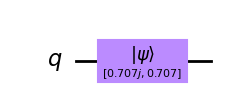

In [15]:
qc = QuantumCircuit(1) # Redefine qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw('mpl')

Dadurch wird das Qubit konkret in den folgenden Zustand versetzt:

$$ |q\rangle = \tfrac{i}{\sqrt{2}}|0\rangle + \tfrac{1}{\sqrt{2}}|1\rangle $$

Das lässt sich auch sogleich überprüfen:

In [16]:
state = execute(qc, backend).result().get_statevector()
print("Qubit State = " + str(state))

Qubit State = [4.32978028e-17+0.70710678j 7.07106781e-01+0.j        ]


Das entspricht wie erwartet dem Zustand `[0.+0.70710678j 0.70710678+0.j]`.

Was ergibt nun die Messung dieses Zustandes?

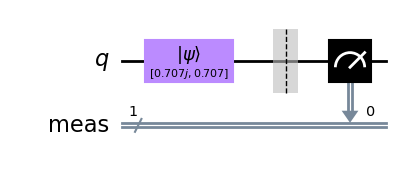

In [17]:
qc.measure_all()
qc.draw('mpl')

Wenn wir diesen Schaltkreis nun mehrmals durchlaufen, stellen wir fest, dass eine der Amplituden _immer_ $0$ ist.

In [18]:
state = execute(qc, backend).result().get_statevector()
print("Zustand des gemessenen Qubits = " + str(state))

Zustand des gemessenen Qubits = [6.123234e-17+1.j 0.000000e+00+0.j]


## 5. Die Blochkugel <a id="bloch-sphere"></a>


Der Zustand eines Qubits $|q\rangle$ lässt sich allgemein als Superposition der Basiszustände beschreiben:

$$
|q\rangle = \alpha|0\rangle + \beta|1\rangle
$$

 Wobei für die Amplituden $\alpha, \beta \in \mathbb{C}$ gilt und diese somit i. A. komplexe Zahlen sind.

Viele dieser Zustände sind physikalisch nicht unterscheidbar, wie wir weiter oben gesehen haben. Deshalb wäre eine Schreibweise wünschbar bei der man die beobachtbaren und die unbeobachtbaren Grössen voneinander trennt.


Der erste Schritt dazu besteht darin, den obigen zustand folgendermassen umzuschreiben:

$$
|q\rangle = \alpha|0\rangle + e^{i\phi}\beta|1\rangle
$$

Dadurch erreicht man, dass $\alpha, \beta, \phi \in \mathbb{R}$ werden. Weil zusätzlich die Normierungsbedingung erfüllt sein muss, gilt weiter:

$$
\sqrt{\alpha^2 + \beta^2} = 1
$$


was mit der trigonometrischen Idendität $\sqrt{\sin^2{x} + \cos^2{x}} = 1$ dazu führt, dass

die reellen $\alpha$- and $\beta$- Terme  durch einen Parameter $\theta$ ausgedrückt werden können:

$$
\alpha = \cos{\tfrac{\theta}{2}}, \quad \beta=\sin{\tfrac{\theta}{2}}
$$

Dadurch können wir den Zustand durch zwei reelle Zahlen $\phi$ and $\theta$ (mit $\theta, \phi \in \mathbb{R}$) ausdrücken:

$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

Der Parameter $\phi$ lässt sich als Phasenwinkel in der Gauss'schen Zahlenebene auffassen. Auch der Parameter $\theta$ muss einem Winkel entsprechen, da er als Argument der Winkelfunktionen $\sin$ und $\cos$ auftritt. Welche Bedeutung diesen Winkeln zugeschrieben werden kann, wollen wir im Folgenden untersuchen.


### Visuelle Darstellung eines Qubit-Zustandes <a id="bloch-sphere-2"></a>

Stellen wir uns den Zustand eines Qubits als Einheitsvektor im dreidimensionalen Raum $\mathbb{R}$ vor, dann entspricht der Ausdruck

$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

exakt der Polarkoordinaten-Darstellung dieses Vektors mit $\theta$ und $\phi$ als die sphärischen koordinaten eines Einheitsvektors mit $r = 1$. Damit lässt sich jeder Zustand eines Qubits als Punkt auf der Einheitskugel darstellen: 

<img src="Bilder\Blochkugel.png" width="500 px">

Im Zusammenhang mit Qubits wird diese Kugel als $Bloch-Kugel$ bezeichnet. Der Winkel $\theta$ gibt Auskunft darüber, ob der Zustand näher bei $|0\rangle$ (Norpol) oder näher bei $|1\rangle$ (Südpol) liegt. Es ist auch anschaulich einleuchtend, dass dieser Winkel mit der Messwahrscheinlichkeit zusammenhängen muss. Für $\theta=90°$ liegt der Zustandsvektor in der $x,y$-Ebene. Die Messwahrscheinlichkeit in einem dieser Zustände muss für beide Messergebnisse $|0\rangle$ und $|1\rangle$ je $p=0.5$ betragen.

Darauswird auch einsichtig, dass im Argunemt der $\cos$- und $\sin$-Funktion $\theta/2$ stehen muss und nicht $\theta$. Für $\theta=180°$ liegt der Zustand $|1\rangle$ vor. Der $\cos$ muss dann $eins$ und der $\sin$ $Null$ sein. Das geht nur, wenn man als Argument der Winkelfunktionen $\theta/2$ setzt.


Below we have plotted a qubit in the state $|{+}\rangle$. In this case, $\theta = \pi/2$ and $\phi = 0$.

Qiskit stellt eine Funktion zum Zeichnen eines Zustandsvektors auf der Bloch-Kugel zur Verfügung: `plot_bloch_vector()`. Als Argument verlangt diese Funktion kartesische Koordinaten. Damit lässt sich z. B. sofort ein Zustand mit den Koordinaten $[0, 1, 0]$ zeichnen:


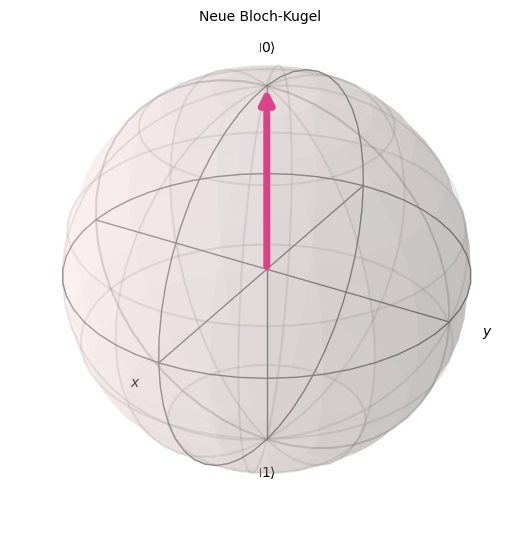

In [19]:
from qiskit.visualization import plot_bloch_vector
coords = [0,0,1] # [Theta, Phi, Radius]
plot_bloch_vector(coords, title="Neue Bloch-Kugel", ax=None, figsize=None) # Bloch Vektor in kartesischen koordinaten

Dies entspricht dem Zustand $|{+}\rangle$, wobei $\theta = \pi/2$ und $\phi = 0$ ist. Will man den Zustandsvektor in Abhängigkeit von $\theta$ und $\phi$ schreiben, müssen die Winkelkoordinaten zuerst in kartesische Koordinaten umgerechnet werden.

theta= 80.2 phi= 0.5


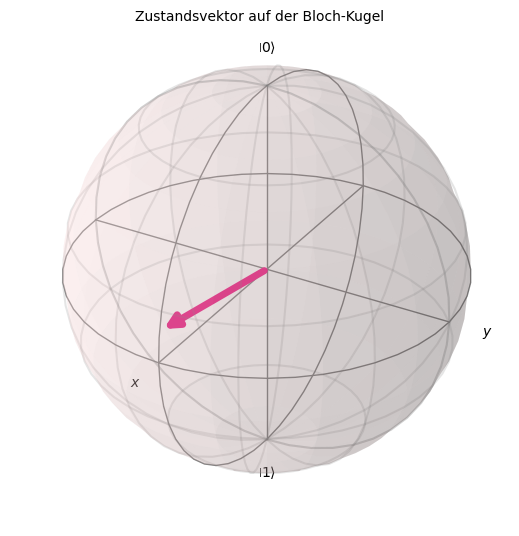

In [20]:
from qiskit.visualization import plot_bloch_vector
from math import sin, cos, pi

#Input: Winkel in Grad:
theta=80.2; phi=0.5
    
def kartesische_koordinaten(theta,phi):
    thetar=float(theta/180*pi)
    phir=float(phi/180*pi)
    x=sin(thetar)*cos(phir)
    y=sin(thetar)*sin(phir)
    z=cos(thetar)
    print("theta=", theta, "phi=", phi)
    return [x,y,z]
    

     
plot_bloch_vector(kartesische_koordinaten(theta,phi), title="Zustandsvektor auf der Bloch-Kugel", ax=None, figsize=None)






#### Anmerkung:
Bei dem Pfeil auf der Bloch-Kugel handelt es sich lediglich um eine Darstellung des Zustandvektors eines Qubits, der durch die Zustandsfunktion 

$$
|q\rangle = \alpha|0\rangle + e^{i\phi}\beta|1\rangle
$$

gegeben ist. Die Darstellung ist sehr intuitiv an ein Spin-$1/2$-Teilchen wie z.B. ein Elektron beim _Stern-Gerlach_-Experiment angelehnt, bei dem zwei Spinzustände $up$ und $down$ beobachtet werden. 

Der Zustand $|0\rangle$ entspricht _Spin up_ und der Zustand $|1\rangle$ _Spin down_.


#### Kurze Übung
Benutze die Funktion`plot_bloch_vector()` mit den Winkelkoordinaten, um die Zustandsvektoren darzustellen.

1. $|0\rangle$
2. $|1\rangle$
3. $\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
4. $\tfrac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)$
5. $\tfrac{1}{\sqrt{2}}\begin{bmatrix}i\\1\end{bmatrix}$
